# PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format



## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
directorio = r"C:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\ML_LEAD SCORING\01_src\01_data_sample\TRABAJO"

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [4]:
# Crear la ruta correctamente
ruta = os.path.join(directorio, nombre_df)

# Cargar el archivo pickle
df = pd.read_pickle(ruta)

print("Archivo cargado correctamente.")

Archivo cargado correctamente.


In [5]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_mms,paginas_vistas_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660737,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.70,0.44,0
660728,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.10,0.30,0.12,0.70,0.44,0
660727,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.04,0.68,0.10,0.60,1.00,1
660719,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.14,0.05,0.50,0.67,0
660681,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.63,0.05,0.70,0.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579622,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.26,0.63,0.13,0.60,0.56,1
579615,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.10,0.09,0.12,0.60,1.00,1
579564,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.16,0.82,0.13,0.70,0.67,1


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [6]:
target = 'compra'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [7]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

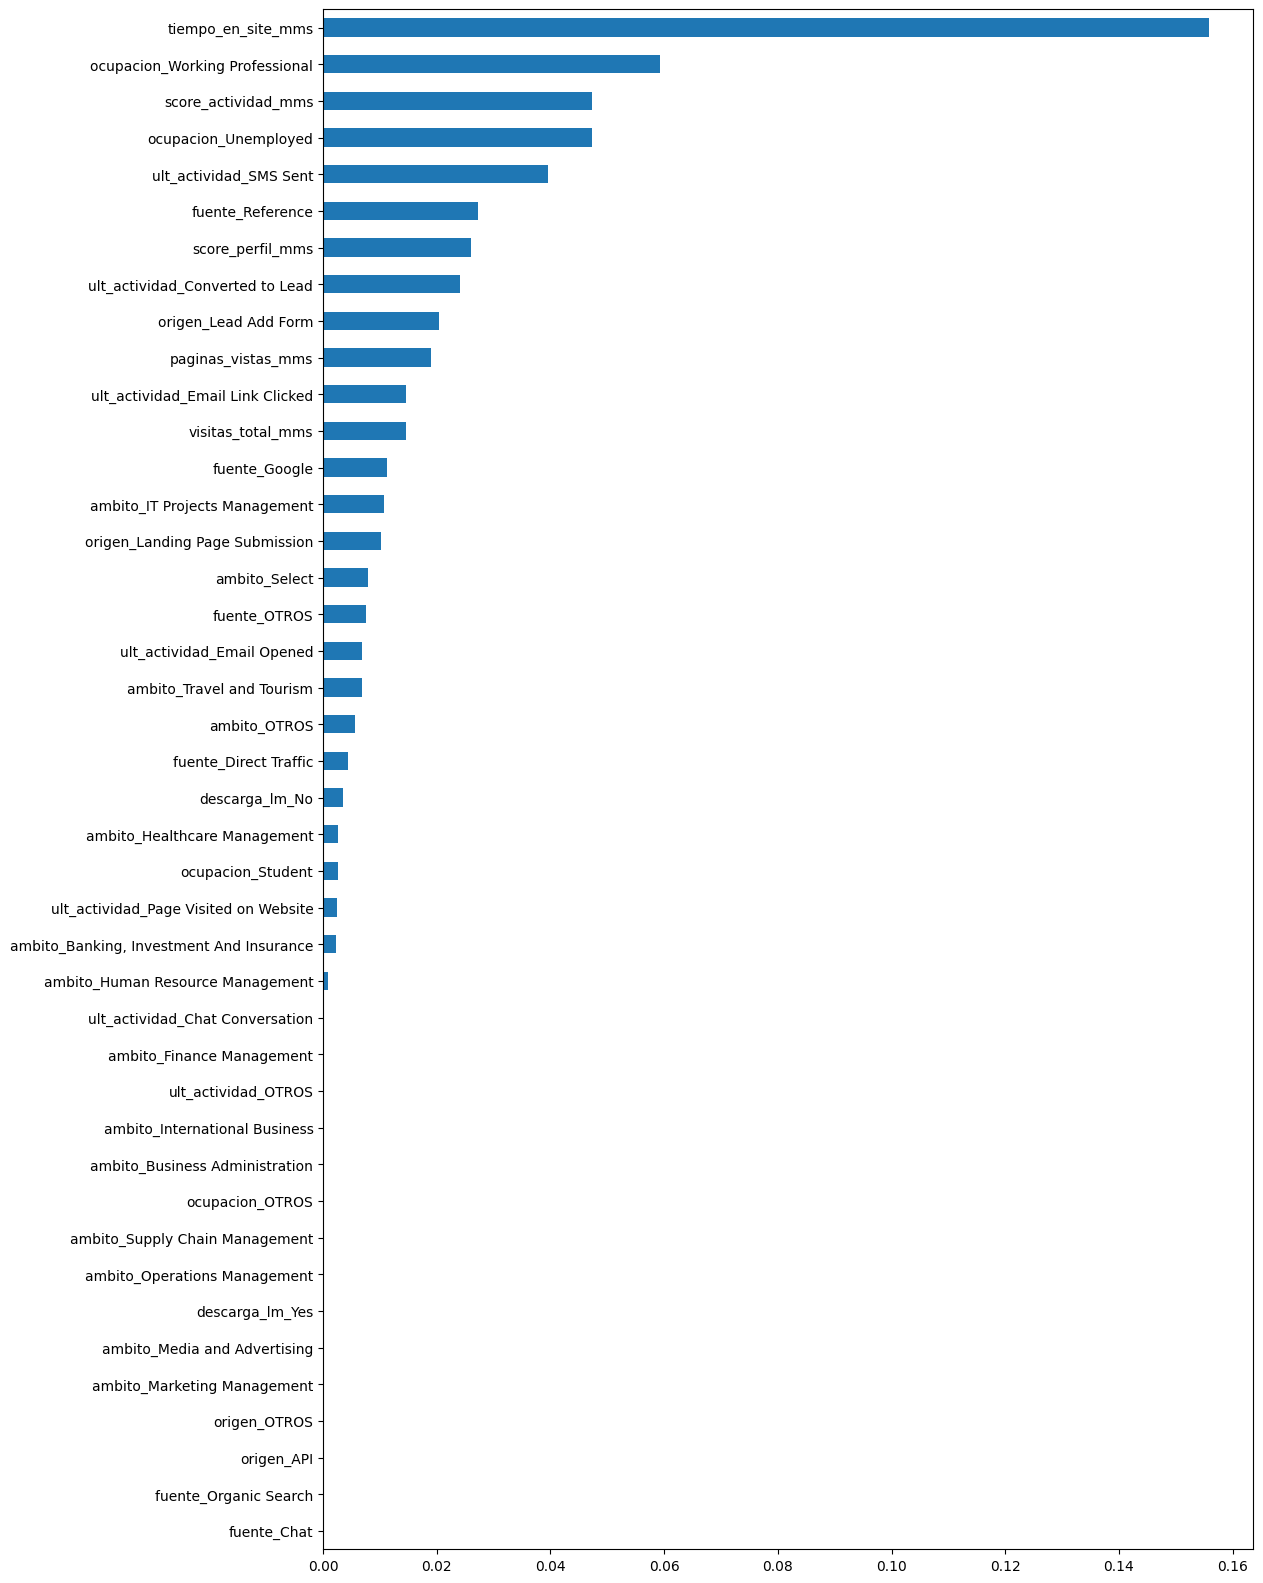

In [8]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [9]:
# de forma manual segun grafica nos quedamos con los 17 primeros resultados
posicion_variable_limite = 17

##### Extraer los nombres de las que entran

In [10]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [11]:
x_mi = x[entran_mi].copy()

In [12]:
x_mi.T

id,660737,660728,660727,660719,660681,660680,660673,660664,660624,660616,...,579717,579712,579701,579697,579642,579622,579615,579564,579546,579533
tiempo_en_site_mms,0.00,0.30,0.68,0.14,0.63,0.00,0.73,0.00,0.03,0.03,...,0.86,0.54,0.39,0.45,0.79,0.63,0.09,0.82,0.11,0.57
ocupacion_Working Professional,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
score_actividad_mms,0.70,0.70,0.60,0.50,0.70,0.90,0.60,0.70,0.60,0.50,...,0.60,0.70,0.50,0.70,0.60,0.60,0.60,0.70,0.60,0.70
ocupacion_Unemployed,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
ult_actividad_SMS Sent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00
fuente_Reference,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
score_perfil_mms,0.44,0.44,1.00,0.67,0.78,0.44,1.00,0.44,0.33,0.56,...,0.56,1.00,1.00,1.00,1.00,0.56,1.00,0.67,0.89,0.78
ult_actividad_Converted to Lead,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
origen_Lead Add Form,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
paginas_vistas_mms,0.00,0.12,0.10,0.05,0.05,0.00,0.10,0.00,0.10,0.20,...,0.10,0.33,0.10,0.20,0.10,0.13,0.12,0.13,0.10,0.15


### Recursive Feature Elimination

#### Instanciar

In [13]:
rfe = RFE(estimator = XGBClassifier( n_jobs = -1, eval_metric='auc'))

#### Entrenar

In [14]:
rfe.fit(x,y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, feature_weights=None,
                            gamma=None, grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=-1,
                            num_parallel_tree=None, ...))

##### Extraer los nombres de las que entran

In [15]:
entran_rfe = x.columns[rfe.support_]

In [16]:
entran_rfe

Index(['origen_Landing Page Submission', 'origen_Lead Add Form',
       'fuente_Direct Traffic', 'ult_actividad_Chat Conversation',
       'ult_actividad_Converted to Lead', 'ult_actividad_OTROS',
       'ult_actividad_Page Visited on Website', 'ult_actividad_SMS Sent',
       'ambito_Human Resource Management', 'ambito_IT Projects Management',
       'ambito_Marketing Management', 'ambito_Select', 'ocupacion_OTROS',
       'ocupacion_Unemployed', 'ocupacion_Working Professional',
       'descarga_lm_No', 'visitas_total_mms', 'tiempo_en_site_mms',
       'paginas_vistas_mms', 'score_actividad_mms', 'score_perfil_mms'],
      dtype='object')

#### Crear el dataframe con la selección

In [17]:
x_rfe = x[entran_rfe].copy()

In [18]:
x_rfe.T

id,660737,660728,660727,660719,660681,660680,660673,660664,660624,660616,...,579717,579712,579701,579697,579642,579622,579615,579564,579546,579533
origen_Landing Page Submission,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,...,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00
origen_Lead Add Form,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fuente_Direct Traffic,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
ult_actividad_Chat Conversation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ult_actividad_Converted to Lead,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ult_actividad_OTROS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
ult_actividad_Page Visited on Website,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ult_actividad_SMS Sent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00
ambito_Human Resource Management,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
ambito_IT Projects Management,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


### Permutation Importance

#### Crear una función para mostrar el resultado

In [19]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [20]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

#### Revisar la salida

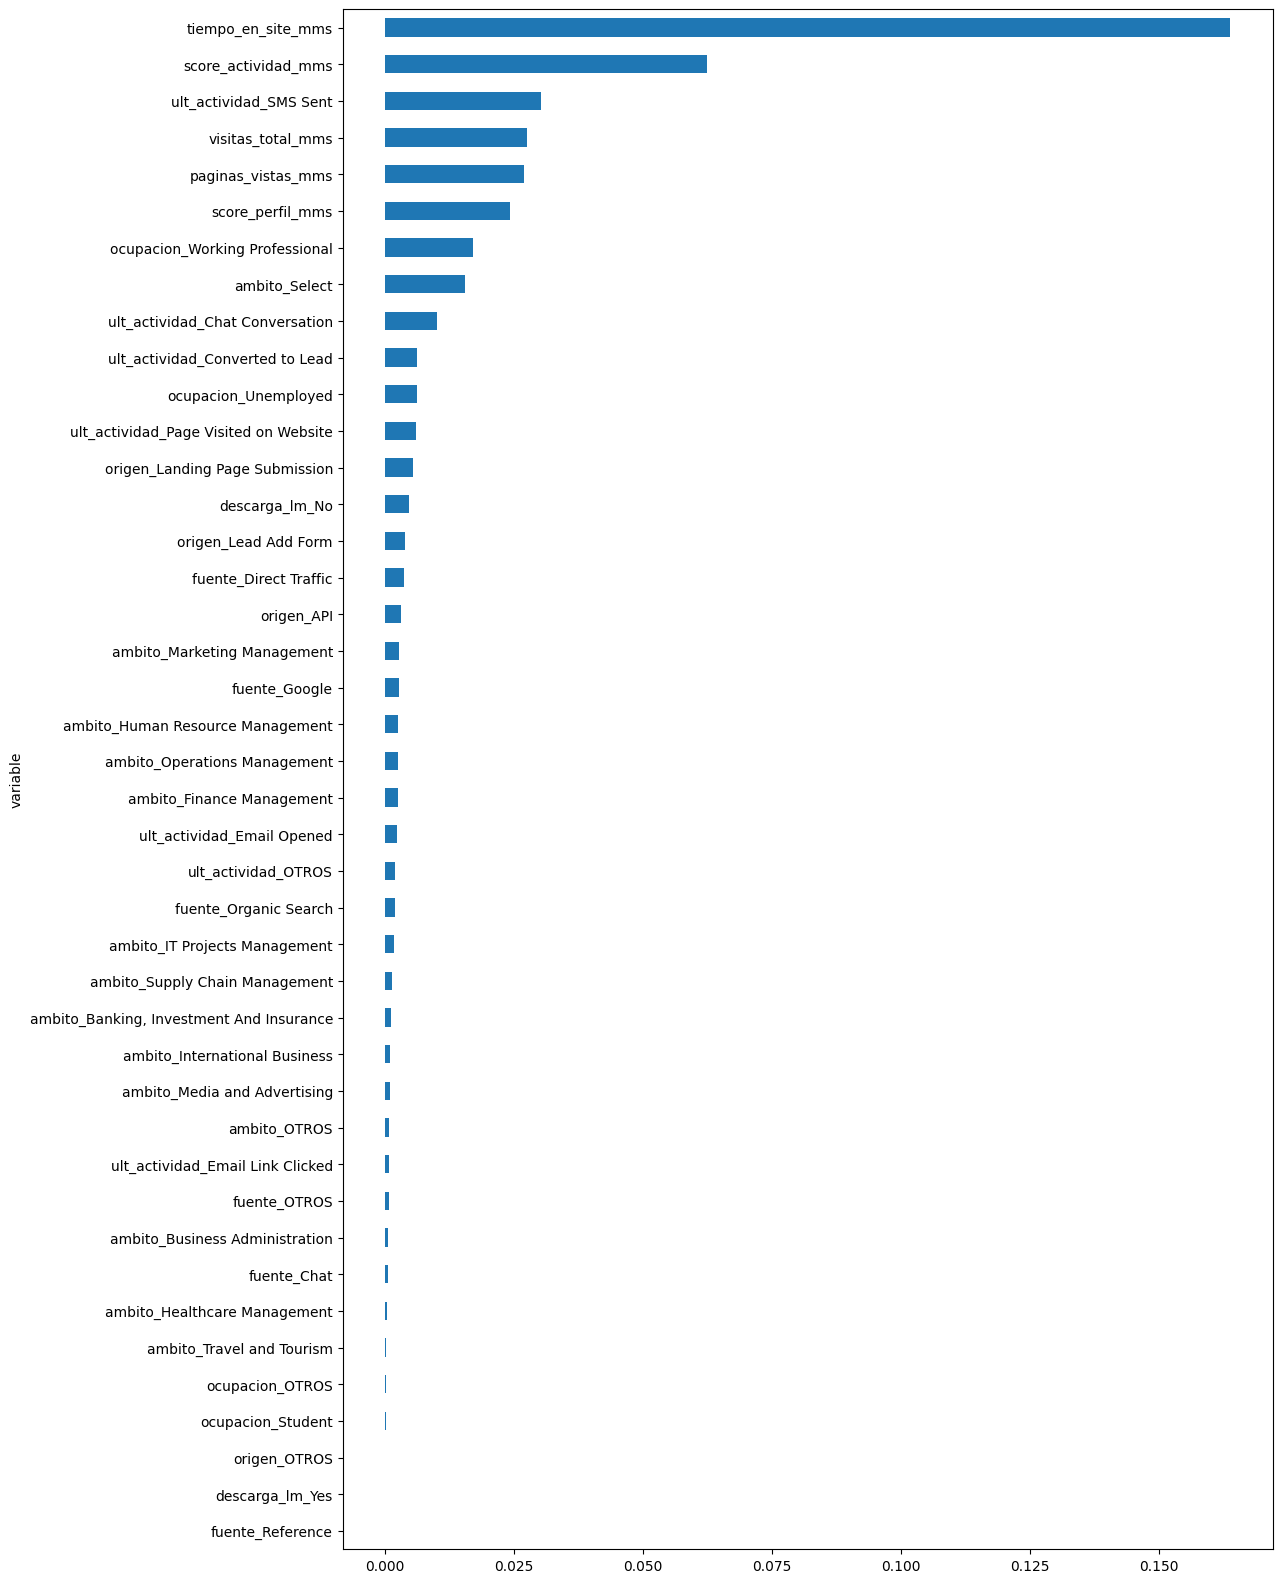

In [21]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [22]:
posicion_variable_limite = 16

##### Extraer los nombres de las que entran

In [23]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [24]:
x_per = x[entran_per].copy()

In [25]:
x_per.T

id,660737,660728,660727,660719,660681,660680,660673,660664,660624,660616,...,579717,579712,579701,579697,579642,579622,579615,579564,579546,579533
tiempo_en_site_mms,0.00,0.30,0.68,0.14,0.63,0.00,0.73,0.00,0.03,0.03,...,0.86,0.54,0.39,0.45,0.79,0.63,0.09,0.82,0.11,0.57
score_actividad_mms,0.70,0.70,0.60,0.50,0.70,0.90,0.60,0.70,0.60,0.50,...,0.60,0.70,0.50,0.70,0.60,0.60,0.60,0.70,0.60,0.70
ult_actividad_SMS Sent,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00
visitas_total_mms,0.00,0.10,0.04,0.02,0.04,0.00,0.04,0.00,0.04,0.08,...,0.08,0.26,0.04,0.16,0.04,0.26,0.10,0.16,0.04,0.12
paginas_vistas_mms,0.00,0.12,0.10,0.05,0.05,0.00,0.10,0.00,0.10,0.20,...,0.10,0.33,0.10,0.20,0.10,0.13,0.12,0.13,0.10,0.15
score_perfil_mms,0.44,0.44,1.00,0.67,0.78,0.44,1.00,0.44,0.33,0.56,...,0.56,1.00,1.00,1.00,1.00,0.56,1.00,0.67,0.89,0.78
ocupacion_Working Professional,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ambito_Select,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
ult_actividad_Chat Conversation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ult_actividad_Converted to Lead,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## SELECCIONAR EL MÉTODO FINAL

Seleccionamos el metodo de permutacion importance ( pero son similares)

In [26]:
# x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [27]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [28]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [29]:
cor_finales.var1.value_counts()

var1
ambito_Select                     2
descarga_lm_No                    2
origen_Landing Page Submission    2
ocupacion_Working Professional    1
visitas_total_mms                 1
fuente_Direct Traffic             1
score_perfil_mms                  1
paginas_vistas_mms                1
Name: count, dtype: int64

##### Revisar detalle

In [30]:
cor_finales.head(50)

,var1,var2,corr
106,ocupacion_Working Professional,ocupacion_Unemployed,0.86
124,ambito_Select,origen_Landing Page Submission,0.70
253,fuente_Direct Traffic,descarga_lm_No,0.58
52,visitas_total_mms,paginas_vistas_mms,0.54
220,descarga_lm_No,origen_Landing Page Submission,0.51
207,origen_Landing Page Submission,fuente_Direct Traffic,0.46
215,descarga_lm_No,ambito_Select,0.44
87,score_perfil_mms,ambito_Select,0.36
197,origen_Landing Page Submission,score_perfil_mms,0.36
76,paginas_vistas_mms,origen_Landing Page Submission,0.33


#### Filtrar variables

Meter en una lista las que queramos descartar por alta correlacion y eliminarlas.

In [31]:
a_eliminar_corr = [ 'origen_Landing Page Submission','descarga_lm_No']

In [32]:
x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [33]:
x_preseleccionado.columns.to_list()

['tiempo_en_site_mms',
 'score_actividad_mms',
 'ult_actividad_SMS Sent',
 'visitas_total_mms',
 'paginas_vistas_mms',
 'score_perfil_mms',
 'ocupacion_Working Professional',
 'ambito_Select',
 'ult_actividad_Chat Conversation',
 'ult_actividad_Converted to Lead',
 'ocupacion_Unemployed',
 'ult_actividad_Page Visited on Website',
 'origen_Lead Add Form',
 'fuente_Direct Traffic']

### EN ESTE CASO NO HACEMOS BALANCEO DE PQ LOS DATOS ESTAN YA BALANCEADOS

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [34]:
# Definir el directorio donde se guardarán los archivos
directorio = r"C:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\ML_LEAD SCORING\01_src\01_data_sample\TRABAJO"

# Rutas de los archivos 
nombre_x_preseleccionado = os.path.join(directorio, f"x_preseleccionado.pickle")
nombre_y_preseleccionado = os.path.join(directorio, f"y_preseleccionado.pickle")
nombre_variables_finales = os.path.join(directorio, f"variables_finales.pickle")


In [35]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

print("Archivos guardados con éxito:")

Archivos guardados con éxito:


In [36]:
x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)